In [1]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from distribution_operation import *
from utils import *
from numerical_routine import *
from posterior_computation import *
from ash import *

In [2]:
betahat=  np.array([1,2,3,4,5])
sebetahat=np.array([1,0.4,5,1,1])

res= ash(betahat, sebetahat)

Iteration 0, Loss: 19.57178412411187
Iteration 100, Loss: 19.571784022820918
Iteration 200, Loss: 19.571784022820918
Iteration 300, Loss: 19.571784022820918
Iteration 400, Loss: 19.571784022820918


In [3]:
true_val1=  np.random.normal(loc=0, scale=2, size=100)
true_val0=  np.zeros( 100)

observations_mu_1 =true_val1+np.random.normal(loc=0, scale=1, size=100)
observations_mu_0 =true_val0+ np.random.normal(loc=0, scale=1, size=100)
# Combine them into one array
betahat = np.hstack([observations_mu_1, observations_mu_0])
sebetahat=  np.repeat(1, betahat.shape[0])

In [4]:
res= ash(betahat, sebetahat)
print(res.pi) 

Iteration 0, Loss: 247.56513510525332
Iteration 100, Loss: 252.22651240530072
Iteration 200, Loss: 246.6898228060532
Iteration 300, Loss: 245.49947058096393
Iteration 400, Loss: 254.68038746943319
[6.06079374e-01 4.88223733e-13 5.19053325e-13 7.25920141e-13
 1.35943308e-12 1.74281754e-01 2.19638872e-01 0.00000000e+00
 0.00000000e+00]


nice conservative behaviour

Text(0, 0.5, 'posterior mean')

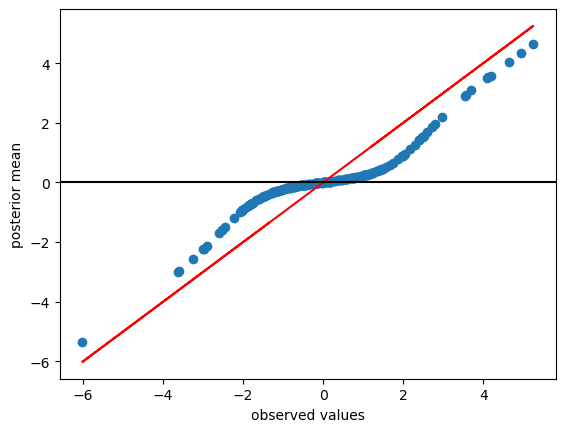

In [5]:
plt.scatter(betahat, res.post_mean  )
plt.xlabel("observed values")
plt.plot(betahat, betahat, color='red', label='x = y')
plt.axhline(y=0, color="black")
plt.ylabel("posterior mean")

In [6]:
print( np.sqrt(np.mean((np.concatenate((true_val1 , true_val0))     - betahat )**2)))
print(np.sqrt(np.mean((np.concatenate((true_val1 , true_val0))     - res.post_mean  )**2)))

0.9748490685508685
0.7840089236774269


In [7]:
true_val1=  np.random.normal(loc=0, scale=2, size=1000)
true_val0=  np.zeros( 1000)

observations_mu_1 =true_val1+np.random.normal(loc=0, scale=1, size=1000)
observations_mu_0 =true_val0+ np.random.normal(loc=0, scale=1, size=1000)

# Combine them into one array
betahat = np.hstack([observations_mu_1, observations_mu_0])
sebetahat=  np.repeat(1, betahat.shape[0])

In [8]:
res= ash(betahat, sebetahat)
print(res.pi) 

Iteration 0, Loss: 235.3143086060717
Iteration 100, Loss: 247.09291720756076
Iteration 200, Loss: 254.7691602556475
Iteration 300, Loss: 254.68694518585394
Iteration 400, Loss: 247.88215050029146
[6.29702682e-01 8.82025162e-12 9.33979035e-12 1.02513083e-11
 1.36292022e-11 2.28769409e-11 3.60601308e-01 9.69600980e-03
 0.00000000e+00 0.00000000e+00]


in the large scale regime works well

Text(0, 0.5, 'posterior mean')

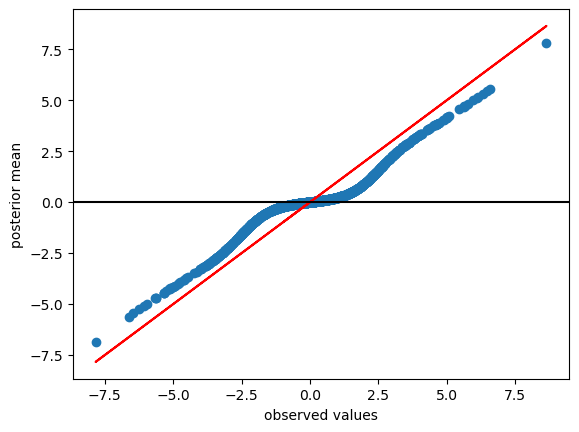

In [9]:
plt.scatter(betahat, res.post_mean  )
plt.xlabel("observed values") 
plt.plot(betahat, betahat, color='red', label='x = y')
plt.axhline(y=0, color="black")
plt.ylabel("posterior mean")

Text(0, 0.5, 'posterior mean')

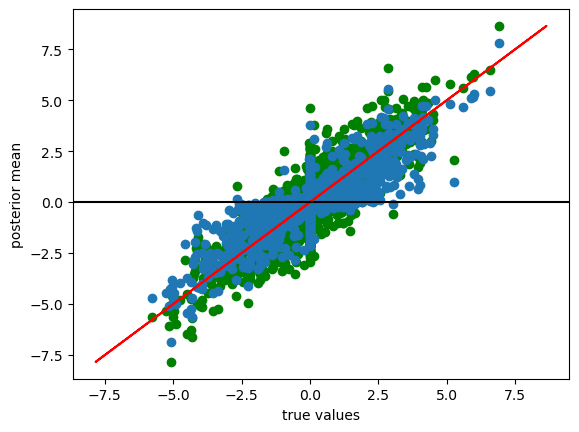

In [10]:
plt.scatter(np.concatenate((true_val1 , true_val0))    , betahat ,color="green" )
plt.scatter(np.concatenate((true_val1 , true_val0))    , res.post_mean  )
plt.xlabel("true values") 
plt.plot(betahat, betahat, color='red', label='x = y')
plt.axhline(y=0, color="black")
plt.ylabel("posterior mean")

In [11]:
print( np.sqrt(np.mean((np.concatenate((true_val1 , true_val0))     - betahat )**2)))
print(np.sqrt(np.mean((np.concatenate((true_val1 , true_val0))     - res.post_mean  )**2)))

1.0158779059277603
0.7781247323791365
